# Assignment 4

Nicolas Larrañaga Cifuentes - Jonathan Alberto Ortiz Rodriguez

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

%matplotlib inline

# 1.a

In [2]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def relu(x):
    if x>= 0 :
        return x
    else :
        return 0;
    
def forward_propagate(x, w):
    '''
    x: input value for neuron 5
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
           0   1   2    3    4    5    6
    Returns: a pair of arrays (a, z), where 
             a has the activation values for each neuron, and
             z the output values for each neuron
    '''
    z = np.zeros(5)
    a = np.zeros(5)
    
    # your code here
    
    #activation for neuron 5
    a[4]= x
    z[4]= x
    #activation for neuron 4
    a[3]= w[6] * z[4]
    z[3] = sigmoid(a[3])
    #activation for neuron 3 
    a[2] = w[5] * z[4]
    z[2] = sigmoid(a[2])
    #activation for neuron 2 
    a[1] = w[3] * z[2] + w[4]*z[3]
    z[1] = relu(a[1])
    #activation for neuron 1
    a[0] = w[0]*z[2] + w[1]*z[1] + w[2]*z[3]
    z[0] = sigmoid(a[0])

    return (a, z)


#(a,z)=forward_propagate(x, w)
#print (a)
#print (z)

# 1.b

In [3]:
def error(expected , real):
    return (expected - real)**2

def derivate_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def derivate_relu(x):
    if x>= 0:
        return 1;
    else :
        return 0;

    
def bp(x, y, w):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
         0    1    2    3    4    5    6
    Returns: an array delta with the delta values for each
             neuron
    '''
    delta = np.zeros(5)
    # neuron 1
    delta[0] = 2 * (y-z[0]) * (-z[0]) * (1-z[0])
    # neuron 2    
    delta[1] = derivate_relu(a[1]) * delta [0] * w[1]
    # neuron 3
    delta[2] = derivate_sigmoid(a[2]) * (delta[1]*w[3] + delta[0]*w[0])
    # neuron 4 
    delta[3] = derivate_sigmoid(a[3]) * (delta[1]*w[4] + delta[0]*w[2])
    # neuron 5
    delta[4] = derivate_sigmoid(a[4])* (delta[2]*w[5] + delta[3]*w[6])
    return delta




#y=0.731204118803
#delta=bp(x,y,w)
#print (delta)


# 1.c


In [4]:
def train_step(x, y, w, eta):
    '''
    x: input value for neuron 5
    y: output value for neuron 1
    w: weights array in the following order
       [w13, w12, w14, w32, w42, w53, w54]
         0    1    2    3    4     5   6
    eta: learning rate
    Returns: updated w array
    '''
    # Calculate dw
    # Your code here
    dw = np.zeros(7)
    #w53
    dw[5] = delta[2] * z[4]
    #w54
    dw[6] = delta[3] * z[4]
    #w32
    dw[3] = delta[1] * z[2]
    #w42
    dw[4] = delta[1] * z[3]
    #w31
    dw[0] = delta[0] * z[2]
    #w21
    dw[1] = delta[0] * z[1]
    #w41
    dw[2] = delta[0] * z[3]
    
    w = w - eta*dw
    return w
#eta=0.5
#updated_w=train_step(x,y,w,eta)
#print(updated_w)

Text(0.5,1,'prediction')

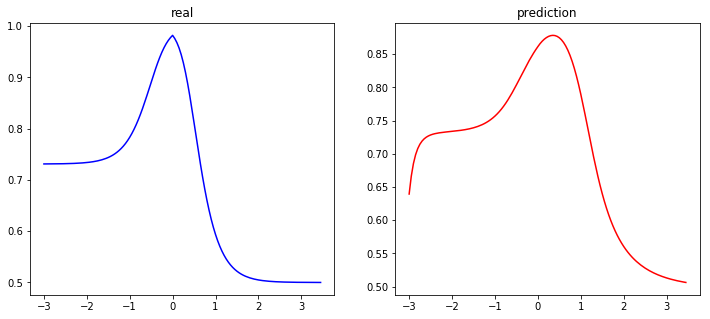

In [34]:
file = open("samples_assign4.txt", "r") 
x = []
y = []
for line in file:
    if( line == "\n" ): continue
    u,v = line.split()
    x.append(u)
    y.append(v)
x = np.array(x, dtype=float)
y = np.array(y, dtype=float)

# lets train 
# assuming
# random values for the weihgts from -1 to 1 
N = len(x)
w= np.zeros(7);

for i in range(7):
    w[i]=np.random.uniform(-2.0,2.0)

eta=0.7
predictions=[]
for i in range(N):
    (a,z)=forward_propagate(x[i], w)
    predictions.append(z[0])
    delta=bp(x,y[i],w)
    updated_w= train_step(x, y, w, eta)    
    w=updated_w

fig = plt.figure( figsize = (12,5) )
ax1 = fig.add_subplot(121)
ax1.plot( x,y,'b')
ax1.set_title("real")

ax2 = fig.add_subplot(122)
ax2.plot(x,predictions,'r')
ax2.set_title("prediction")
#ax2.title("predictions")


### conclusion 
since weights are initialized randomly sometimes its predictions are very unsuccessful its depens also in the learning rate, if too low it gives almost a linear predictns if too high , nearly 1 it gives a pretty nice prediction

# 3.1

In [105]:
import numpy as np
import urllib
from matplotlib import pyplot as plt
import random
import sys

from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras.layers.wrappers import TimeDistributed
from keras.applications import mobilenet
from keras.applications.mobilenet import preprocess_input, decode_predictions
from PIL import Image, ImageFile
from keras.preprocessing.image import img_to_array as preprocess_image
from tabulate import tabulate
from keras import optimizers
from sklearn.utils import shuffle
from keras.utils.generic_utils import CustomObjectScope


__PATH = 'birds/'
birds = ['egret', 'mandarin', 'owl', 'puffin', 'toucan', 'wood_duck']
__NUMBER_OF_SAMPLES = 101
__EXTENSION = '.jpg'
__SIZE = (224, 224)

def get_string_digit(n):
    if n < 10:
        return '00' + str(n)
    elif n <100:
        return '0' + str(n)
    else:
        return str(n)
def get_prefix(name):
    return 'wod' if name == 'wood_duck' else name[:3]

In [21]:
model = mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [38]:
samples = []
for bird in birds:
    for i in range(1, __NUMBER_OF_SAMPLES):
        ImageFile.LOAD_TRUNCATED_IMAGES = True
        image = Image.open(__PATH + bird + '/' + get_prefix(bird) + get_string_digit(i) + __EXTENSION)
        image = image.resize(__SIZE, Image.ANTIALIAS)
        sample = preprocess_input(preprocess_image(image))
        samples.append(sample)
        

/Users/larra/Documents/11/ML/UNAL-Machine-learning/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/Users/larra/Documents/11/ML/UNAL-Machine-learning/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/Users/larra/Documents/11/ML/UNAL-Machine-learning/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/Users/larra/Documents/11/ML/UNAL-Machine-learning/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " S

In [45]:
samples = np.array(samples)
labels = model.predict(samples)

In [47]:
labels = decode_predictions(labels, top=1)

40960/35363 [==================================] - 0s 8us/step


In [71]:
for label in labels:
    if label[0][1] in count:
        count[label[0][1]] += 1
    else:
        count[label[0][1]] = 1

In [73]:
data = []
for key, item in count.items():
    data.append((key, item))
data.sort(key = lambda tup: tup[1], reverse=True)
data = data[:10]
data = list(map(lambda x: x[0], data))

In [84]:
matrix = [[0 for i in range(6)] for j in range(10)]

index = {}
for i, name in enumerate( data ):
        index[name] = i
i = 0
for label in labels:
    name = label[0][1]
    if name in data:
        matrix[index[name]][i // 100] +=1
    i += 1    

print_matrix = []
for name in data:
    row = [name]
    row += matrix[index[name]]
    print_matrix.append(row)

print(tabulate(print_matrix, headers=['Predict/Real'] + birds))
        

Predict/Real      egret    mandarin    owl    puffin    toucan    wood_duck
--------------  -------  ----------  -----  --------  --------  -----------
drake                 0          79      0        11         0           97
toucan                0           0      0        16        96            0
American_egret       90           0      0         0         0            0
ptarmigan             0           0     31         2         0            0
magpie                0           0      0        18         0            0
African_grey          0           0     17         0         0            0
great_grey_owl        0           0     15         0         0            0
albatross             0           0      2        13         0            0
water_ouzel           0           1      0         7         0            0
kite                  0           0      5         2         0            0


# 3.2

In [97]:
model_transfer = mobilenet.MobileNet(input_shape=(224,224,3),
                                     alpha=1.0,
                                     depth_multiplier=1,
                                     dropout=1e-3,
                                     include_top=True,
                                     weights='imagenet',
                                     input_tensor=None,
                                     pooling=None,
                                     classes=1000)



In [98]:
for layer in model_transfer.layers:
    layer.trainable = False
own_model = model_transfer.output
own_model = Dense(256, activation="relu")(own_model)
output_neurons = Dense(6, activation="softmax")(own_model)
model_transfer = Model(input=model_transfer.input, output=output_neurons)
model_transfer.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_transfer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

/Users/larra/Documents/11/ML/UNAL-Machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [103]:
__PERCLASS_SIZE = 100
__TRAINING_SIZE = 0.7 * __PERCLASS_SIZE

y = [[(1 if j==i//100 else 0) for j in range(6)] for i in range(len(samples))]
y = np.array(y)
tx, ty = [], []
vx, vy = [], []
for i in range(0, 600, 100):
    for j in range(__TRAINING_SIZE):
        tx.append(samples[i+j])
        ty.append(y[i+j])
    for j in range(__TRAINING_SIZE, 100):
        vx.append(samples[i+j])
        vy.append(y[i+j])
tx, ty = np.array(tx), np.array(ty)
vx, vy = np.array(vx), np.array(vy)
tx, ty = shuffle(tx, ty, random_state=0)

In [106]:
model_transfer.fit(tx, ty, batch_size=18, epochs=90)

Epoch 1/1
420/420 [==============================] - 45s 106ms/step - loss: 1.7882 - acc: 0.2762


In [ ]:
# model_transfer.save('birds_transfered.h5')
# with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
#     model_transfer = load_model('birds_transfered.h5')

In [113]:
validation = model_transfer.predict(vx)

In [125]:
__PERCLASS_SIZE = 100
__TRAINING_SIZE = 0.7 * __PERCLASS_SIZE
def get_idx(prediction):
    ans = 0
    for i, it in enumerate(prediction):
        if it > prediction[ans]:
            ans = i
    return ans

index = list(map(lambda prediction: get_idx(prediction), validation))
matrix = [[0 for j in range(6)] for i in range(6)]
for i, pred_id in enumerate(index):
    matrix[ pred_id][i // 30] += 1
confusion_matrix = []
for i, bird in zip(range(6), birds):
     row = [bird]
     row += matrix[i]
     confusion_matrix.append(row)
print(tabulate(confusion_matrix, headers=['Predict/Real'] + birds))

Predict/Real      egret    mandarin    owl    puffin    toucan    wood_duck
--------------  -------  ----------  -----  --------  --------  -----------
egret                30           0     11        10         1            1
mandarin              0          29      7        13         4           29
owl                   0           1      7         0         0            0
puffin                0           0      0         4        25            0
toucan                0           0      2         0         0            0
wood_duck             0           0      3         3         0            0


# 3.3

In [ ]:
model_transfer_modifications_allowed = mobilenet.MobileNet(input_shape=(224,224,3),
                                     alpha=1.0,
                                     depth_multiplier=1,
                                     dropout=1e-3,
                                     include_top=True,
                                     weights='imagenet',
                                     input_tensor=None,
                                     pooling=None,
                                     classes=1000)

In [ ]:
own_model = model_transfer_modifications_allowed.output
own_model = Dense(256, activation="relu")(own_model)
output_neurons = Dense(6, activation="softmax")(own_model)
model_transfer_modifications_allowed = Model(input=model_transfer_modifications_allowed.input, output=output_neurons)
model_transfer_modifications_allowed.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
model_transfer_modifications_allowed.summary()

In [ ]:
__PERCLASS_SIZE = 100
__TRAINING_SIZE = 0.7 * __PERCLASS_SIZE

y = [[(1 if j==i//100 else 0) for j in range(6)] for i in range(len(samples))]
y = np.array(y)
tx, ty = [], []
vx, vy = [], []
for i in range(0, 600, 100):
    for j in range(__TRAINING_SIZE):
        tx.append(samples[i+j])
        ty.append(y[i+j])
    for j in range(__TRAINING_SIZE, 100):
        vx.append(samples[i+j])
        vy.append(y[i+j])
tx, ty = np.array(tx), np.array(ty)
vx, vy = np.array(vx), np.array(vy)
tx, ty = shuffle(tx, ty, random_state=0)

In [ ]:
model_transfer_modifications_allowed.fit(tx, ty, batch_size=18, epochs=90)

In [ ]:
validation = model_transfer_modifications_allowed.predict(vx)

In [ ]:
__PERCLASS_SIZE = 100
__TRAINING_SIZE = 0.7 * __PERCLASS_SIZE

index = list(map(lambda prediction: get_idx(prediction), validation))
matrix = [[0 for j in range(6)] for i in range(6)]
for i, pred_id in enumerate(index):
    matrix[ pred_id][i // 30] += 1
confusion_matrix = []
for i, bird in zip(range(6), birds):
     row = [bird]
     row += matrix[i]
     confusion_matrix.append(row)
print(tabulate(confusion_matrix, headers=['Predict/Real'] + birds))